Mean: [13.06571429  3.53571429]
Median: [4.865  3.1875]
Standard Deviation: [14.00408905  0.37404214]


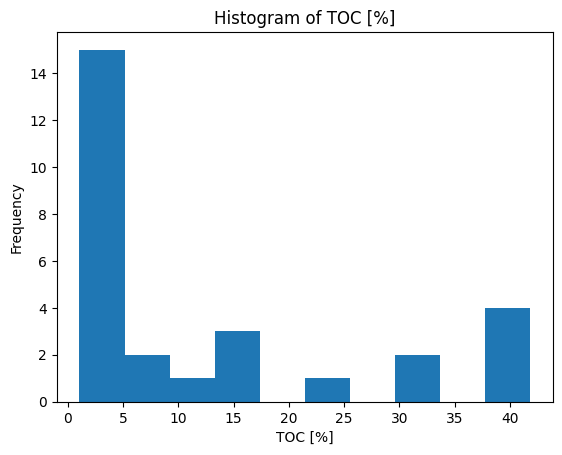

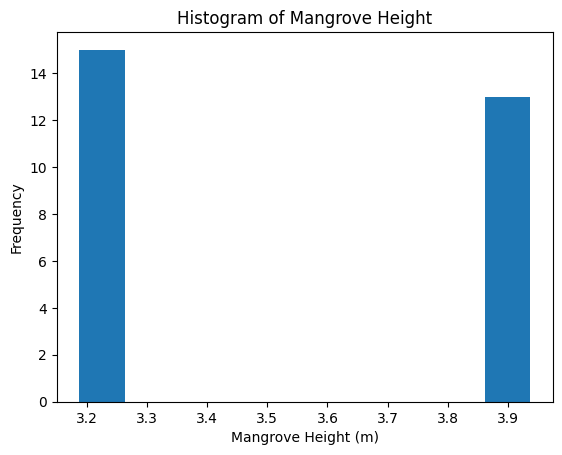

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

filename="mangrove_height_TOC.csv"

file=open(filename) #open file

#Data sorting variables
header = []
LoL = []

#Flag that you are going to start at the first line of the file.
first=True
for line in file:
    line=line.strip()
    if first == True:
        header=line.split(",")
        #process the header
        first = False
    else:
        sp_Line=line.split(",")
        LoL.append(sp_Line)
        
values=[] #LoL of values
height=[]
TOC=[]
location=[]

for row in LoL:
    values.append(row[1:])

for row in LoL:
    height.append(row[1])
    TOC.append(row[2])
    location.append(row[0])
    
    
array=np.array(values, dtype=float) #make the array of values using numpy

data_mean = np.mean(array, axis=0)
print("Mean:", data_mean)

data_median = np.median(array, axis=0)
print("Median:", data_median)

data_stddev = np.std(array, axis=0)
print("Standard Deviation:", data_stddev)

# Histogram

data = pd.read_csv("~/mangrove_height_TOC.csv", sep =",")
toc_values = data["TOC [%]"]

# Create histogram
plt.figure()
plt.hist(toc_values)      # number of bins can be changed
plt.xlabel("TOC [%]")
plt.ylabel("Frequency")
plt.title("Histogram of TOC [%]")

plt.figure()
plt.hist(data["Mangrove h [m]"])
plt.xlabel("Mangrove Height (m)")
plt.ylabel("Frequency")
plt.title("Histogram of Mangrove Height")
plt.show()

PearsonRResult(statistic=0.5180893216216533, pvalue=0.004741561593497163)
<class 'scipy.stats._stats_py.PearsonRResult'>
r = 0.5180893216216533
p = 0.004741561593497163
SignificanceResult(statistic=0.6383874903877033, pvalue=0.0002567185502258197)
<class 'scipy.stats._stats_py.SignificanceResult'>
r = 0.6383874903877033
p = 0.0002567185502258197
LinregressResult(slope=0.013837904052515754, intercept=3.354912185050987, rvalue=0.5180893216216531, pvalue=0.00474156159349718, stderr=0.004480339637754977, intercept_stderr=0.08581077440303723)
y = 0.01x + 3.35


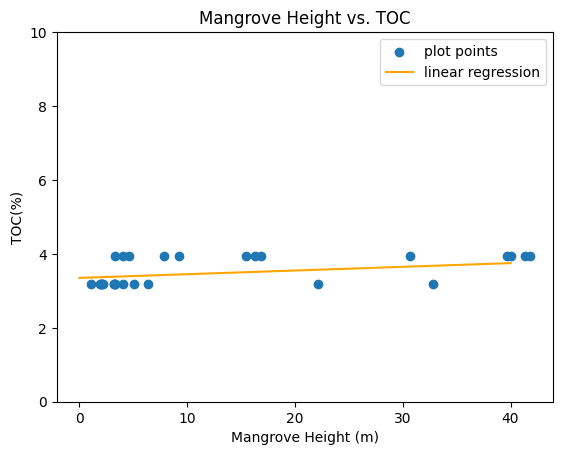

In [2]:
import numpy as np
#give two function imputs
import scipy
from scipy import stats

#to get just one type res.statistic or res.pvalue
array_x=np.array(height, dtype=float)
array_y=np.array(TOC, dtype=float)

PT = stats.pearsonr(array_x,array_y) #scipy.stats.pearsonr is the pearson correlation function
print(PT)
print(type(PT))
print("r =", PT.statistic)
print("p =", PT.pvalue)

SP = stats.spearmanr(array_x,array_y) #scipy.stats.pearsonr is the pearson correlation function
print(SP)
print(type(SP))
print("r =", SP.statistic)
print("p =", SP.pvalue)

LR=stats.linregress(array_x,array_y)
print(LR)
print("y =", str(np.round(LR.slope,decimals=2))+"x +", str(np.round(LR.intercept, decimals=2)))

# Instaciate the plot
fig,ax = plt.subplots()
# Make a scatter plot
ax.scatter(array_x, array_y)
# Set labels to the plot
plt.ylim(0, 10)
ax.set_xlabel("Mangrove Height (m)")
ax.set_ylabel("TOC(%)")
ax.set_title("Mangrove Height vs. TOC")


x = np.linspace(0, 40, 100)

# Define your equation
y = 0.01*x + 3.35

# Plot
plt.plot(x, y, color="orange")

ax.legend(["plot points", "linear regression"])

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

for i in data:    
    if i != "Event":
        linR=scipy.stats.linregress(data[i], data['Mangrove h [m]'])
        #print(linR)
        m=np.round(linR.slope, 3)
        b=np.round(linR.intercept, 3)
        r=np.round(linR.rvalue, 3)
        p=linR.pvalue
        print(i, "    Regression Line: y="+str(m)+"x+"+str(b), "; R="+str(r), "; p="+str(p))

TOC [%]     Regression Line: y=0.014x+3.355 ; R=0.518 ; p=0.00474156159349718
Mangrove h [m]     Regression Line: y=1.0x+0.0 ; R=1.0 ; p=1.2696044921876337e-257


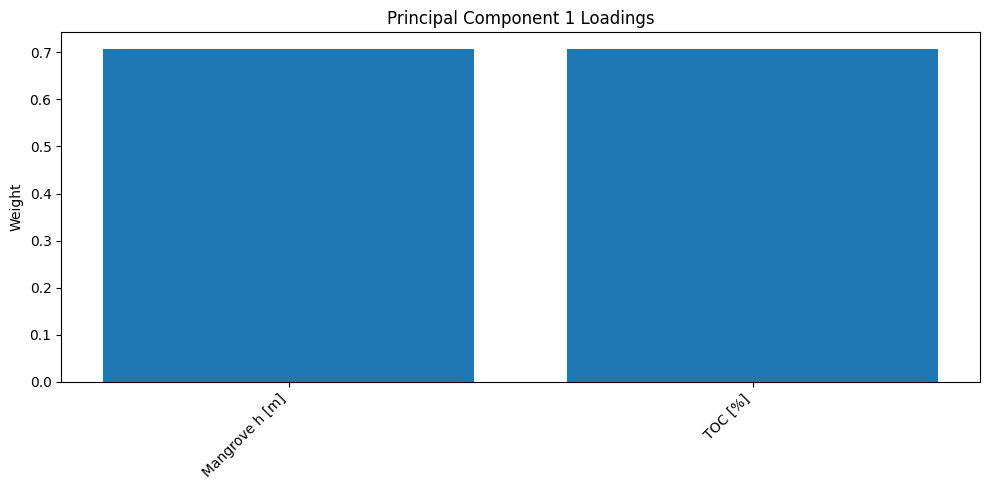

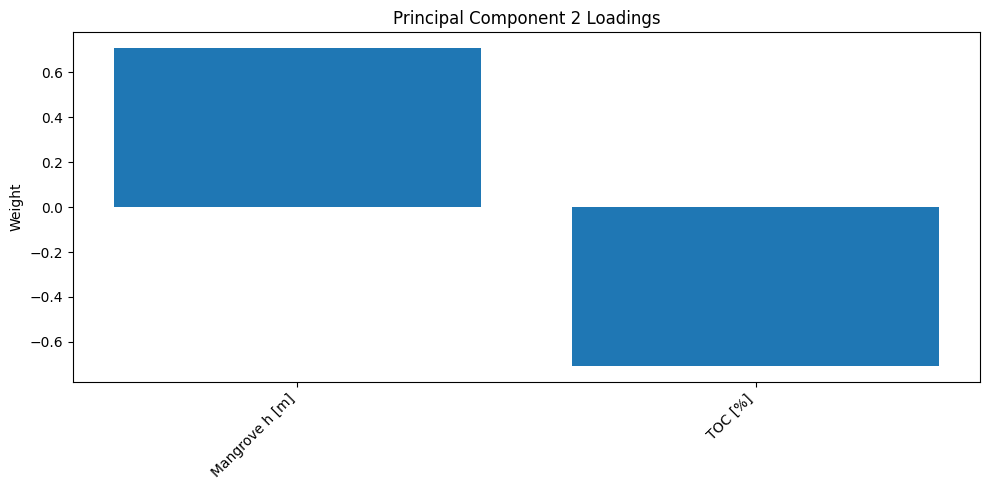

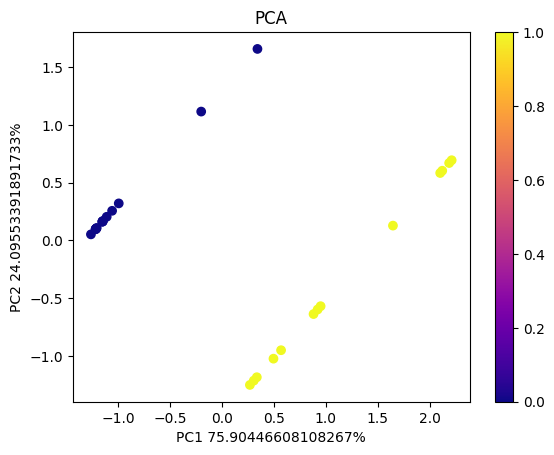

In [4]:
## Rescaling our Data

dfclean = data.drop('Event', axis=1)
#print(dfclean)
#print(df)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dfclean)


columns= [
    "Mangrove h [m]", "TOC [%]"
]

X = data[columns].dropna()

pca = PCA()
pca.fit(scaled_data)

loadings = pca.components_      # shape = (#PCs, #variables)
num_pcs = loadings.shape[0]

for i in range(num_pcs):
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(columns)), loadings[i])
    plt.xticks(range(len(columns)), columns, rotation=45, ha="right")
    plt.ylabel("Weight")
    plt.title(f"Principal Component {i+1} Loadings")
    plt.tight_layout()
    plt.show()
    
    
### Creating the PCA Analysis
pca = PCA(n_components=0.99) # To retain 99% of variance
PCs = pca.fit_transform(scaled_data)

### Possible Outputs
#print(PCs)
#print(pca.explained_variance_ratio_)
#pca.components_
pc1pct = str(pca.explained_variance_ratio_[0]*100)+"%"
#print(pc1pct)
pc2pct = str(pca.explained_variance_ratio_[1]*100)+"%"

colors = data['Event'].astype('category').cat.codes

### Ploting the PCA

fig,ax = plt.subplots()
ax.set_xlabel("PC1 " + pc1pct)  ### IN CLASS: Improve this
ax.set_ylabel("PC2 " + pc2pct)

ax.set_title('PCA')
plt.scatter(PCs[:, 0], PCs[:, 1], c=colors, cmap="plasma")
plt.colorbar()


